<a href="https://colab.research.google.com/github/harshelke180502/ML_ASSIGNMENT_2/blob/main/Harsh_Shelke_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machine (SVM) - Coding Assignment **[30 points]**

## **Objective:**
In this assignment, you will work with the **Predicting a Pulsar Star dataset** and use **Support Vector Machines (SVM)** to classify pulsar stars. You will:
- Perform **Exploratory Data Analysis (EDA)**.
- Preprocess the dataset (**handling missing values, outliers, and scaling**).
- Implement **Soft-Margin SVM** and **Kernel SVM**.
- Tune **hyperparameters** (C and kernel type) to optimize model performance.
- Compare different models and interpret results.

---

## **1. Load Libraries and Dataset**

In [ ]:

!pip install ucimlrepo

import pandas as pd
from ucimlrepo import fetch_ucirepo

# Fetched the dataset
htru2 = fetch_ucirepo(id=372)  # HTRU2 Pulsar Dataset

# Features (X) and Target (y) as DataFrames
X = htru2.data.features  # Features DataFrame (contains 8 columns)
y = htru2.data.targets   # Target DataFrame (1 column: 'class')

# Combined X and y into a single DataFrame
df = pd.concat([X, y], axis=1)

# Displayed the first 5 rows
print("First 5 rows of the dataset:")
print(df.head())

# Dataset information
print("\nDataset information:")
print(df.info())

# Class distribution (important for imbalance check)
print("\nClass distribution (0=Non-Pulsar, 1=Pulsar):")
print(df['class'].value_counts())

First 5 rows of the dataset:
   Profile_mean  Profile_stdev  Profile_skewness  Profile_kurtosis   DM_mean  \
0    140.562500      55.683782         -0.234571         -0.699648  3.199833   
1    102.507812      58.882430          0.465318         -0.515088  1.677258   
2    103.015625      39.341649          0.323328          1.051164  3.121237   
3    136.750000      57.178449         -0.068415         -0.636238  3.642977   
4     88.726562      40.672225          0.600866          1.123492  1.178930   

    DM_stdev  DM_skewness  DM_kurtosis  class  
0  19.110426     7.975532    74.242225      0  
1  14.860146    10.576487   127.393580      0  
2  21.744669     7.735822    63.171909      0  
3  20.959280     6.896499    53.593661      0  
4  11.468720    14.269573   252.567306      0  

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --

In [ ]:
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,Profile_mean,Profile_stdev,Profile_skewness,Profile_kurtosis,DM_mean,DM_stdev,DM_skewness,DM_kurtosis,class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# # Load dataset
# data_path = "/content/HTRU_2.csv"
# df = pd.read_csv(data_path)

# # Display first 5 rows
# df.head()

## **2. Exploratory Data Analysis (EDA)**
### Task 1: Check dataset dimensions, column names, and missing values.

In [ ]:
# Dataset shape
print("Dataset shape:", df.shape)

Dataset shape: (17898, 9)


In [ ]:
print("Column names:", df.columns)

Column names: Index(['Profile_mean', 'Profile_stdev', 'Profile_skewness', 'Profile_kurtosis',
       'DM_mean', 'DM_stdev', 'DM_skewness', 'DM_kurtosis', 'class'],
      dtype='object')


In [ ]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 Profile_mean        0
Profile_stdev       0
Profile_skewness    0
Profile_kurtosis    0
DM_mean             0
DM_stdev            0
DM_skewness         0
DM_kurtosis         0
class               0
dtype: int64


In [ ]:
print("Summary statistics:\n", df.describe())

Summary statistics:
        Profile_mean  Profile_stdev  Profile_skewness  Profile_kurtosis  \
count  17898.000000   17898.000000      17898.000000      17898.000000   
mean     111.079968      46.549532          0.477857          1.770279   
std       25.652935       6.843189          1.064040          6.167913   
min        5.812500      24.772042         -1.876011         -1.791886   
25%      100.929688      42.376018          0.027098         -0.188572   
50%      115.078125      46.947479          0.223240          0.198710   
75%      127.085938      51.023202          0.473325          0.927783   
max      192.617188      98.778911          8.069522         68.101622   

            DM_mean      DM_stdev   DM_skewness   DM_kurtosis         class  
count  17898.000000  17898.000000  17898.000000  17898.000000  17898.000000  
mean      12.614400     26.326515      8.303556    104.857709      0.091574  
std       29.472897     19.470572      4.506092    106.514540      0.288432  


"""
### **Task 2: Preprocess the dataset**
1. Remove leading spaces in column names.
2. Rename columns to short and meaningful names.
3. Check for class imbalance in the `target_class` column.
"""

Cleaned Column Names: ['Profile_mean', 'Profile_stdev', 'Profile_skewness', 'Profile_kurtosis', 'DM_mean', 'DM_stdev', 'DM_skewness', 'DM_kurtosis', 'target_class']

Class Distribution (%):
target_class
0    90.842552
1     9.157448
Name: proportion, dtype: float64

Absolute Counts:
target_class
0    16259
1     1639
Name: count, dtype: int64


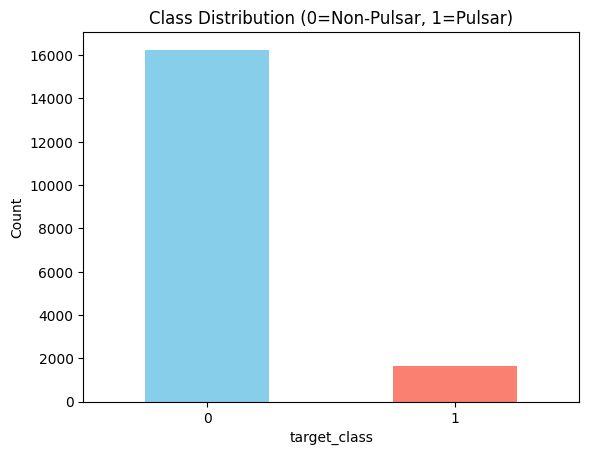

In [ ]:
# Remove leading spaces
df.columns = df.columns.str.strip()
df.columns

new_column_names = {
    'Mean_IP': 'mean_ip',
    'SD_IP': 'std_ip',
    'Kurtosis_IP': 'kurtosis_ip',
    'Skewness_IP': 'skewness_ip',
    'Mean_DMSNR': 'mean_dmsnr',
    'SD_DMSNR': 'std_dmsnr',
    'Kurtosis_DMSNR': 'kurtosis_dmsnr',
    'Skewness_DMSNR': 'skewness_dmsnr',
    'class': 'target_class'
}
df = df.rename(columns=new_column_names)

# 3. Checked for class imbalance
class_distribution = df['target_class'].value_counts(normalize=True) * 100

print("Cleaned Column Names:", df.columns.tolist())
print("\nClass Distribution (%):")
print(class_distribution)
print("\nAbsolute Counts:")
print(df['target_class'].value_counts())

# Visualized the class imbalance using a barplot
import matplotlib.pyplot as plt
df['target_class'].value_counts().plot(kind='bar',
                                     color=['skyblue', 'salmon'],
                                     title='Class Distribution (0=Non-Pulsar, 1=Pulsar)')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.show()


## **3. Handle Outliers Using Boxplots**
### Task 3: Visualize and handle outliers in continuous features.
"""

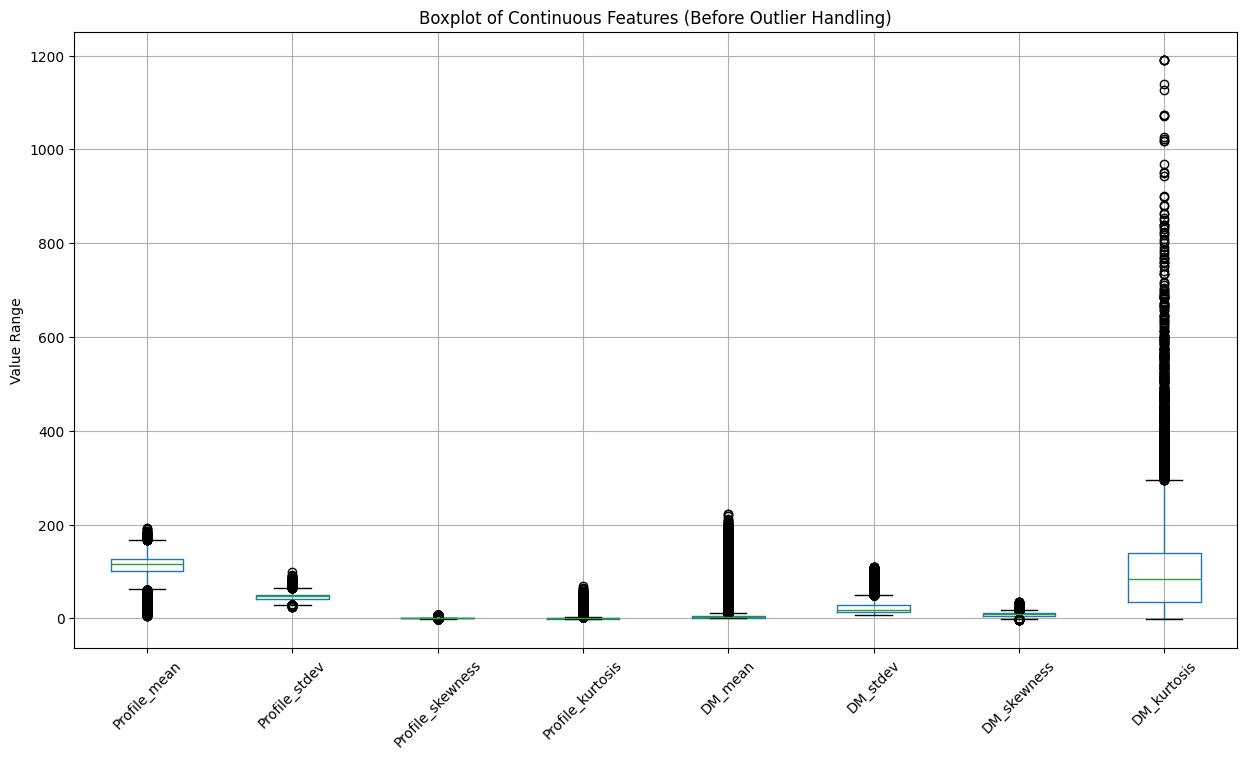

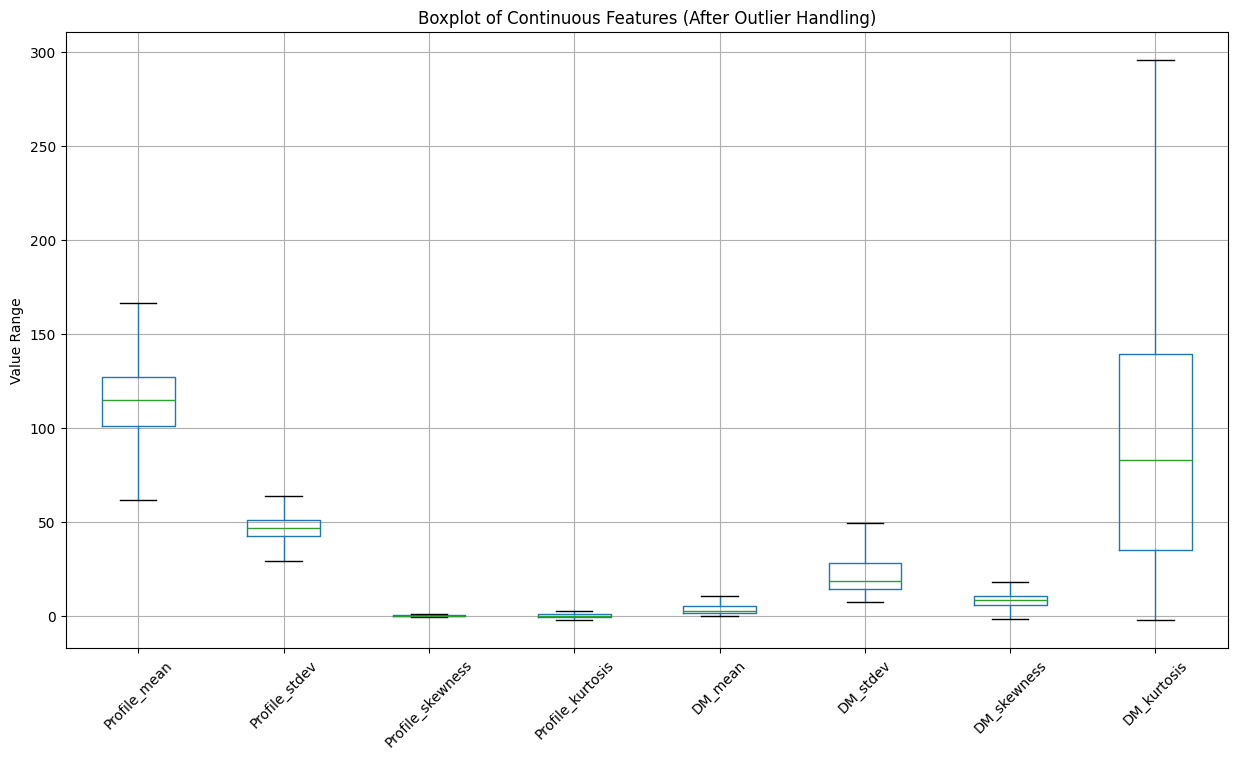


Statistics Before Outlier Handling:
     Profile_mean  Profile_stdev  Profile_skewness  Profile_kurtosis  \
min     61.695312      29.405241         -0.642242         -1.791886   
max    166.320312      63.993979          1.142666          2.602315   

       DM_mean   DM_stdev  DM_skewness  DM_kurtosis  
min   0.213211   7.370432    -1.600675    -1.976976  
max  10.776024  49.414263    18.085140   295.832570  

Statistics After Outlier Handling:
     Profile_mean  Profile_stdev  Profile_skewness  Profile_kurtosis  \
min     61.695312      29.405241         -0.642242         -1.791886   
max    166.320312      63.993979          1.142666          2.602315   

       DM_mean   DM_stdev  DM_skewness  DM_kurtosis  
min   0.213211   7.370432    -1.600675    -1.976976  
max  10.776024  49.414263    18.085140   295.832570  


In [ ]:
continuous_features = [col for col in df.columns if col != 'target_class']

# 2. Visualize outliers using boxplots
plt.figure(figsize=(15, 8))
df[continuous_features].boxplot()
plt.title('Boxplot of Continuous Features (Before Outlier Handling)')
plt.xticks(rotation=45)
plt.ylabel('Value Range')
plt.show()

# 3. Handle outliers using IQR method
def handle_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1 #calculated the inter quartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Capping the outliers
    df[feature] = np.where(df[feature] < lower_bound, lower_bound,
                          np.where(df[feature] > upper_bound, upper_bound,
                                  df[feature]))
    return df

# Applied to all continuous features
for feature in continuous_features:
    df = handle_outliers(df, feature)

# 4. Visualize after outlier handling
plt.figure(figsize=(15, 8))
df[continuous_features].boxplot()
plt.title('Boxplot of Continuous Features (After Outlier Handling)')
plt.xticks(rotation=45)
plt.ylabel('Value Range')
plt.show()

# 5. Compare statistics
print("\nStatistics Before Outlier Handling:")
print(df[continuous_features].describe().loc[['min', 'max']])

print("\nStatistics After Outlier Handling:")
print(df[continuous_features].describe().loc[['min', 'max']])

"""
## **4. Split Data and Scale Features**
### Task 4: Split the dataset into training and test sets (80-20 split) and apply **Standard Scaling**.
"""

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Splitted the data into features (X) and target (y)
X = df.drop('target_class', axis=1)
y = df['target_class']

# Split into train (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Preserve class distribution in splits
)

# Initialized and fitted Standard scaler on training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Applied same scaling to test data

# Converted back to DataFrames for better readability (optional)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

print(f"Training set shape: {X_train_scaled.shape}")
print(f"Test set shape: {X_test_scaled.shape}")

# Verified class distribution(or imbalance) in splits
print("\nTraining set class distribution:")
print(y_train.value_counts(normalize=True))
print("\nTest set class distribution:")
print(y_test.value_counts(normalize=True))

Training set shape: (14318, 8)
Test set shape: (3580, 8)

Training set class distribution:
target_class
0    0.908437
1    0.091563
Name: proportion, dtype: float64

Test set class distribution:
target_class
0    0.90838
1    0.09162
Name: proportion, dtype: float64


"""
## **5. Train Support Vector Machine (SVM) Classifier**
### Task 5: Train an SVM model with **default hyperparameters (C=1.0, RBF Kernel)** and evaluate performance.
"""

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize SVM with default parameters (C=1.0, RBF kernel)
svm_model = SVC(random_state=42)

# Train the model on scaled training data
svm_model.fit(X_train_scaled, y_train)

# Predictions on training and test sets
y_train_pred = svm_model.predict(X_train_scaled)
y_test_pred = svm_model.predict(X_test_scaled)

# Evaluate performance
print("------ Training Set Performance ------")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_train, y_train_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))

print("\n------ Test Set Performance ------")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

------ Training Set Performance ------
Accuracy: 0.9792

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     13007
           1       0.92      0.84      0.88      1311

    accuracy                           0.98     14318
   macro avg       0.95      0.92      0.93     14318
weighted avg       0.98      0.98      0.98     14318


Confusion Matrix:
[[12914    93]
 [  205  1106]]

------ Test Set Performance ------
Accuracy: 0.9774

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3252
           1       0.91      0.83      0.87       328

    accuracy                           0.98      3580
   macro avg       0.95      0.91      0.93      3580
weighted avg       0.98      0.98      0.98      3580


Confusion Matrix:
[[3226   26]
 [  55  273]]


"""
## **6. Tune Hyperparameters: Kernel and C Value**
### Task 6: Train SVM with **RBF kernel and C=100** and compare performance.
"""

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Initialized SVM with RBF kernel and C=100 as requested above
svm_tuned = SVC(
    kernel='rbf',
    C=100,
    random_state=42
)

# Trained the model
svm_tuned.fit(X_train_scaled, y_train)

# Predictions
y_test_pred_tuned = svm_tuned.predict(X_test_scaled)

# Performance evaluation
print("------ Test Set Performance (C=100) ------")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred_tuned):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred_tuned))
print("\nConfusion Matrix for Testing data:")
print(confusion_matrix(y_test, y_test_pred_tuned))

# Compared with default C=1.0 (from Task 5)
print("\n------ Comparison with Default C=1.0 ------")
print(f"Default Accuracy (C=1.0): {accuracy_score(y_test, y_test_pred):.4f}")
print(f"Tuned Accuracy (C=100): {accuracy_score(y_test, y_test_pred_tuned):.4f}")

------ Test Set Performance (C=100) ------
Accuracy: 0.9793

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3252
           1       0.91      0.86      0.88       328

    accuracy                           0.98      3580
   macro avg       0.95      0.93      0.94      3580
weighted avg       0.98      0.98      0.98      3580


Confusion Matrix for Testing data:
[[3224   28]
 [  46  282]]

------ Comparison with Default C=1.0 ------
Default Accuracy (C=1.0): 0.9774
Tuned Accuracy (C=100): 0.9793


### Task 7: Experiment with different values of C (C=10, C=1000) and compare the accuracy.
Try modifying the C value and analyze its impact on overfitting.


In [ ]:
from sklearn.svm import SVC

# Defined the C values to test as per the above requirements
c_values = [10, 1000]

for c in c_values:
    print(f"\n====== Training SVM with C={c} ======")

    # Initialized and trained the SVM
    svm_model = SVC(C=c, kernel='rbf', random_state=42)
    svm_model.fit(X_train_scaled, y_train)

    # Predictions
    y_train_pred = svm_model.predict(X_train_scaled)
    y_test_pred = svm_model.predict(X_test_scaled)

    # Calculated accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)






====== Training SVM with C=10 ======

====== Training SVM with C=1000 ======


## **8. Compare Train and Test Accuracy to Detect Overfitting**

---



In [ ]:
# Compared the train and test accuraccies and also printed the difference between the train and test acuraccies to check if overfitting exists or not for 2 different values of C as requested in Task 6.

for c in c_values:
    print(f"\n====== Training SVM with C={c} ======")

    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Difference (Train - Test): {train_accuracy - test_accuracy:.4f}")



====== Training SVM with C=10 ======
Training Accuracy: 0.9834
Test Accuracy: 0.9804
Difference (Train - Test): 0.0030

====== Training SVM with C=1000 ======
Training Accuracy: 0.9834
Test Accuracy: 0.9804
Difference (Train - Test): 0.0030


## **9. Print training set accuracy and compare with test accuracy.**

---

In [ ]:

for c in c_values:
# Classification report
    print("\nTest Set Classification Report for ",c," :")
    print(classification_report(y_test, y_test_pred))



Test Set Classification Report for  10  :
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3252
           1       0.91      0.87      0.89       328

    accuracy                           0.98      3580
   macro avg       0.95      0.93      0.94      3580
weighted avg       0.98      0.98      0.98      3580


Test Set Classification Report for  1000  :
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3252
           1       0.91      0.87      0.89       328

    accuracy                           0.98      3580
   macro avg       0.95      0.93      0.94      3580
weighted avg       0.98      0.98      0.98      3580



"""
## **10. Tune Hyperparameters: Kernel and C Value**
###

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

kernels = ['rbf']
c_values = [1.0, 10.0, 100.0]

for kernel in kernels:
    for c in c_values:
        print(f"\n====== Training SVM with Kernel={kernel}, C={c} ======")

        # Initialize and train SVM
        svm_model = SVC(kernel=kernel, C=c, random_state=42)
        svm_model.fit(X_train_scaled, y_train)

        # Predictions
        y_train_pred = svm_model.predict(X_train_scaled)
        y_test_pred = svm_model.predict(X_test_scaled)

        # Calculate accuracies
        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)

        print(f"Training Accuracy: {train_accuracy:.4f}")
        print(f"Test Accuracy: {test_accuracy:.4f}")
        print(f"Gap (Train - Test): {train_accuracy - test_accuracy:.4f}")

        # Classification report
        print("\nClassification Report:")
        print(classification_report(y_test, y_test_pred))

        # Confusion matrix
        print("Confusion Matrix:")
        print(confusion_matrix(y_test, y_test_pred))


====== Training SVM with Kernel=rbf, C=1.0 ======
Training Accuracy: 0.9792
Test Accuracy: 0.9774
Gap (Train - Test): 0.0018

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3252
           1       0.91      0.83      0.87       328

    accuracy                           0.98      3580
   macro avg       0.95      0.91      0.93      3580
weighted avg       0.98      0.98      0.98      3580

Confusion Matrix:
[[3226   26]
 [  55  273]]

====== Training SVM with Kernel=rbf, C=10.0 ======
Training Accuracy: 0.9806
Test Accuracy: 0.9779
Gap (Train - Test): 0.0027

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3252
           1       0.91      0.84      0.87       328

    accuracy                           0.98      3580
   macro avg       0.95      0.92      0.93      3580
weighted avg       0.98      0.98      0.98      3580



"""
## **11. Train SVM with Different Kernels**
###  Train SVM with a **RBF and sigmoid kernel** and compare results.
"""

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

kernels = ['rbf', 'sigmoid','linear']
c_values = [1.0, 10.0, 100.0]

for kernel in kernels:
    for c in c_values:
        print(f"\n====== Training SVM with Kernel={kernel}, C={c} ======")

        # Initialize and train SVM
        svm_model = SVC(kernel=kernel, C=c, random_state=42)
        svm_model.fit(X_train_scaled, y_train)

        # Predictions
        y_train_pred = svm_model.predict(X_train_scaled)
        y_test_pred = svm_model.predict(X_test_scaled)

        # Calculate accuracies
        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)

        print(f"Training Accuracy: {train_accuracy:.4f}")
        print(f"Test Accuracy: {test_accuracy:.4f}")
        print(f"Gap (Train - Test): {train_accuracy - test_accuracy:.4f}")

        # Classification report
        print("\nClassification Report:")
        print(classification_report(y_test, y_test_pred))

        # Confusion matrix
        print("Confusion Matrix:")
        print(confusion_matrix(y_test, y_test_pred))


====== Training SVM with Kernel=rbf, C=1.0 ======
Training Accuracy: 0.9792
Test Accuracy: 0.9774
Gap (Train - Test): 0.0018

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3252
           1       0.91      0.83      0.87       328

    accuracy                           0.98      3580
   macro avg       0.95      0.91      0.93      3580
weighted avg       0.98      0.98      0.98      3580

Confusion Matrix:
[[3226   26]
 [  55  273]]

====== Training SVM with Kernel=rbf, C=10.0 ======
Training Accuracy: 0.9806
Test Accuracy: 0.9779
Gap (Train - Test): 0.0027

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3252
           1       0.91      0.84      0.87       328

    accuracy                           0.98      3580
   macro avg       0.95      0.92      0.93      3580
weighted avg       0.98      0.98      0.98      3580



"""
## **12. Evaluate Model Performance Using Confusion Matrix**
### Compute and visualize the Confusion Matrix.
"""

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

kernels = ['rbf', 'sigmoid','linear']
c_values = [1.0, 10.0, 100.0]

for kernel in kernels:
    for c in c_values:
        print(f"\n====== Training SVM with Kernel={kernel}, C={c} ======")

        # Initialize and train SVM
        svm_model = SVC(kernel=kernel, C=c, random_state=42)
        svm_model.fit(X_train_scaled, y_train)

        # Predictions
        y_train_pred = svm_model.predict(X_train_scaled)
        y_test_pred = svm_model.predict(X_test_scaled)

        # Calculate accuracies
        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)


        print("Confusion Matrix of kernel " ,kernel," with c: ",c )
        print(confusion_matrix(y_test, y_test_pred))




====== Training SVM with Kernel=rbf, C=1.0 ======
Confusion Matrix of kernel  rbf  with c:  1.0
[[3226   26]
 [  55  273]]

====== Training SVM with Kernel=rbf, C=10.0 ======
Confusion Matrix of kernel  rbf  with c:  10.0
[[3225   27]
 [  52  276]]

====== Training SVM with Kernel=rbf, C=100.0 ======
Confusion Matrix of kernel  rbf  with c:  100.0
[[3224   28]
 [  46  282]]

====== Training SVM with Kernel=sigmoid, C=1.0 ======
Confusion Matrix of kernel  sigmoid  with c:  1.0
[[2960  292]
 [ 297   31]]

====== Training SVM with Kernel=sigmoid, C=10.0 ======
Confusion Matrix of kernel  sigmoid  with c:  10.0
[[2959  293]
 [ 297   31]]

====== Training SVM with Kernel=sigmoid, C=100.0 ======
Confusion Matrix of kernel  sigmoid  with c:  100.0
[[2959  293]
 [ 297   31]]

====== Training SVM with Kernel=linear, C=1.0 ======
Confusion Matrix of kernel  linear  with c:  1.0
[[3222   30]
 [  46  282]]

====== Training SVM with Kernel=linear, C=10.0 ======
Confusion Matrix of kernel  linear 

"""
### **Final Task: Answer the following questions in markdown cells.**
1. What is the effect of increasing the C value on the SVM model?
2. Why does the linear kernel perform differently than the RBF kernel?
3. How does feature scaling impact SVM performance?
4. What happens if we don’t handle outliers before training an SVM model?
5. Explain the concept of soft-margin SVM and why it is useful in handling noisy data.
6. Why does the sigmoid kernel perform poorly compared to other kernels?
7. What does the confusion matrix reveal about the model’s predictions?

---

Question 1.

Observations derived:

Test Accuracy Improvement:

1. C=1: Test accuracy = 0.9774
C=100: Test accuracy = 0.9793 (a slight improvement of +0.0019).


2. Impact on Class 1 (Minority Class):
Recall (True Positive Rate):
Increases from 0.83 (C=1) to 0.86 (C=100).
Precision:
Remains stable (~0.91).
F1-Score:
Improves from 0.87 to 0.88.


3. Confusion Matrix Changes:
False Negatives (Class 1 misclassified as Class 0):
Decreases from 55 (C=1) to 46 (C=100).
False Positives (Class 0 misclassified as Class 1):
Slight increase from 26 (C=1) to 28 (C=100).


Key Understandings Devolved:

1. Higher C = Stricter Margin:
A larger C penalizes misclassifications more, leading the SVM to prioritize correctly classifying difficult  points, even if it means a narrower margin.
This helps slightly in improving recall for the minority class (Class 1) but may slightly increase false positives for the majority class (Class 0).

2. Diminishing Returns:
The improvement from C=1 to C=100 is marginal, suggesting that beyond a certain point, increasing C may not significantly improve performance (and could risk overfitting if pushed too far).

Question 2.

(A) Linear Kernel

* It Assumes linear separability in the original feature space.

* Works well when:
Features have a linear relationship with the target.
Data is high-dimensional but separable by a hyperplane (e.g., text data).

* The reason why it is stable across C values:

The optimal decision boundary does not change much with C because the data is already well-separated.
Increasing C does not force the model to fit outliers since the margin is already optimal.

* Linear Kernel may underfit if data requires non-linear separation.

* Formula for Linear Kenel Decision Boundary Calculation: (K(x, y) = x · y)



(B) RBF Kernel

* Captures non-linear relationships by mapping data to higher dimensions.

* A higher C reduces the margin, allowing the model to fit more support vectors (including harder samples).
This helps slightly improve recall for Class 1 (from 0.83 to 0.86).

* The reason why it doesn't outperform linear by much:
The data may not have strong non-linear patterns, so RBF’s flexibility doesn’t provide a big advantage.

* If γ (gamma) is not tuned, RBF may not exploit its full potential.

* Formula for RBF Kernel Decision Boundary Calculation: (K(x, y) = exp(-γ ||x - y||²))

Question 3.

1. Distance-Based Optimization (for Linear & RBF Kernels)

* SVMs aim to maximize the margin.
If features are on different scales, features with larger magnitudes dominate the distance calculations (e.g., Euclidean distance in RBF kernels), leading to biased or suboptimal decision boundaries.
* Example: If Feature A ranges in [0, 1000] and Feature B ranges in [0, 1], Feature A will disproportionately influence the model.


2. Impact on Gradient Descent (for Linear SVM Solvers)

* Many SVM implementations (e.g., sklearn.svm.SVC) use gradient-based optimization. Unscaled features can cause:
* Slow convergence (due to ill-conditioned optimization landscapes).
Numerical instability (e.g., large feature values may cause overflow/underflow).

3. Kernel Performance (Especially RBF)

* The RBF kernel (Gaussian kernel) is highly sensitive to feature scales because it computes distances as:

(K(x, y) = exp(-γ ||x - y||²))


* Unscaled features make distances dominated by high-magnitude features, rendering the kernel ineffective.

* Scaling ensures all features contribute equally to the kernel similarity measure.


Question 4.

1. Distorted Decision Boundary

* SVMs aim to maximize the margin (distance between classes). Outliers can:
Pull the decision boundary toward themselves, forcing the SVM to misclassify other points to accommodate them.
* It might create a suboptimal hyperplane that generalizes poorly to new data.


2.  Misleading Support Vectors

* Support vectors define the decision boundary.

* Outliers can:
Become artificial support vectors, even if they’re noise.
Skew the margin width, leading to overfitting (if the model tries to fit outliers) or underfitting (if the margin becomes too wide to avoid outliers).

3. Sensitivity to Regularization (C)

* The C parameter controls how much misclassifications are penalized:
High C: SVM tries to classify all points correctly, including outliers → overfitting.
* Low C: SVM tolerates outliers but may underfit by ignoring legitimate patterns.
* Unhandled outliers make tuning C harder, as the model’s behavior becomes unpredictable.




Question 5.

Traditional Hard-Margin SVM needs data to be perfectly linearly separable, but real-world datasets often contain noise, outliers, or overlapping classes. The Soft-Margin SVM relaxes this strict requirement by allowing some misclassifications, improving robustness.

oft-Margin SVM modifies the original hard-margin objective by introducing slack variables (ξᵢ) that measure how much a data point violates the margin:

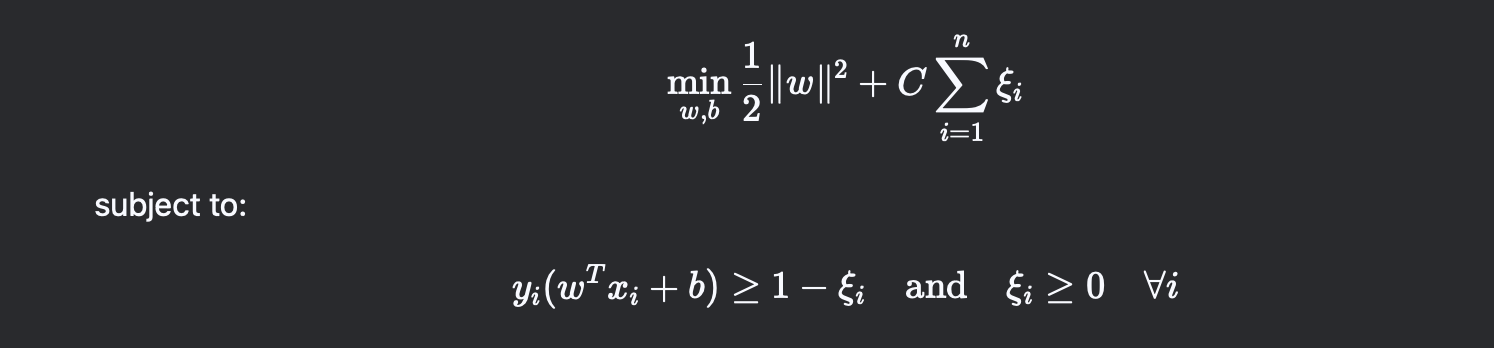

where:

ξᵢ (slack variable):

ξᵢ = 0 → Point is correctly classified outside the margin.

0 < ξᵢ ≤ 1 → Point lies inside the margin but on the correct side.

ξᵢ > 1 → Point is misclassified.

C (regularization parameter):

Controls the trade-off between maximizing the margin and minimizing misclassifications.

Small C: Prioritizes a wide margin (more misclassifications allowed).

Large C: Strictly penalizes misclassifications (narrower margin, risk of overfitting).


**Below are the reasons why soft margin svm is used for noisy data:**

It handles Non-Separable Data
* Hard-Margin SVM fails if classes overlap. Soft-Margin allows some * errors, making it applicable to real-world datasets.

It is robust to Outliers and Noise

* Mislabeled or extreme points no longer force the SVM to fit them perfectly. Slack variables absorb their impact.

It has a Controlled Flexibility through C

* Low C: Tolerates more errors (better for noisy data).

* High C: Behaves like Hard-Margin SVM (risk of fitting noise).

It works Better with Kernels

* Even in high-dimensional spaces (e.g., RBF kernel), soft-margin prevents overfitting to spurious patterns.


Question 6.

A. Hyperparameter Sensitivity

The sigmoid kernel's performance heavily depends on tuning
γ
 and
r:


If
γ is too small, the kernel behaves almost linearly.
If γ is too large, it becomes saturated (outputs near -1 or +1), losing discriminative power.
The intercept r further complicates optimization.


B. Poor Generalization

The sigmoid kernel tends to overfit on small datasets and underfit on large ones. Unlike RBF (universal kernel) or polynomial (flexible with degree), it lacks consistent adaptability.


C. Numerical Instability

For inputs far from the origin, gradients vanish, making optimization slow or stuck in poor local minima.

Question 7.

1. RBF Kernel (Gives the Best Performance)

Trend with Increasing C (1 → 100) goes like this:

Minority Class (1):
False Negatives (FN) decrease (55 to 46): Higher value of C reduces misclassifications of class "1" (better recall).

True Positives (TP) increase (273 to 282): Model becomes more aggressive in predicting class "1".

Majority Class (0):
False Positives (FP) increase slightly (26 to 28): Trade-off for better minority-class recall.

Understanding:
RBF adapts well to the data, and increasing C (stricter margin) improves minority-class performance without significant overfitting (test accuracy remains stable ~97.8%).

2. Sigmoid Kernel (Consistently bad over all values of C)

Consistently Poor Across All C:
Majority Class (0):
High False Positive (292–293): ~9% of class "0" are misclassified as "1".
Minority Class (1):
Extremely high FN (297): ~90% of class "1" are misclassified as "0".
TP remains near-zero (31): The model effectively ignores the minority class.

Understanding/Conclusion:
The sigmoid kernel cannot model the decision boundary for the above data. It defaults to predicting the majority class ("0"), behaving like a random guess for class "1". Changing C has no effect because the kernel itself is the bottleneck.

3. Linear Kernel (Stable but Less Flexible than RBF)

It is Unaffected by C:
Identical confusion matrices across all C values.
Minority Class (1):
False Negatives=46, TP=282: Better than RBF at C=1, but doesn’t improve further.
Majority Class (0):
False Positives=30: Slightly worse than RBF at high C.

Understanding/Copnclusion:
The data almost-linearly separable, so a linear kernel works well. However, RBF’s flexibility allows it to outperform linear as C increases.
